# Python Code(Interactive!)
I haven't figured out how to get the website to use sample .csv's, so I've provided two samples named 'demo' and 'demo2' for you to type in when asked for a file. Copy the 'To Copy' version to get a version that takes in .csv's.

Click the 'Live Code' button after hovering over the rocket ship icon in the top right and scroll down to use this code!

Welcome! Please input the file name you'd like to analyze: demo
Add another file(y/n)?y
Enter a file:demo2
Add another dataFrame(y/n)?n
Would you like to look at spending(s) or income(i)?s
Would you like to filter out a category(y/n)? This question will repeat if you type 'y' and give an input to the next question:y
Enter the category you want to filter out:Rent
Would you like to filter out a category(y/n)? This question will repeat if you type 'y' and give an input to the next question:n
Would you like to set a date range(y/n)? y
Enter the minimum date you want to filter your data(MM/DD/YYYY):03/03/2025
Enter the maximum date you want to filter your data(MM/DD/YYYY:04/15/2025



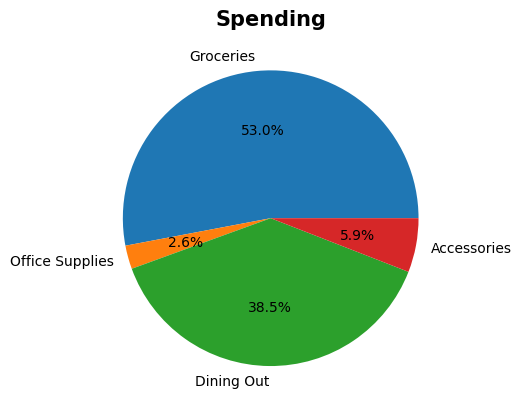

,Date,Description,Category,Amount
0,03/29/25,WOODER SAM S #421 GEORGIA ST,Groceries,11.07
1,03/30/25,TARGET 00098234 GEORGIA ST,Office Supplies,4.58
2,04/04/25,UI CHAMPAG STAT CENTR GEORGIA ST,Dining Out,10.50
3,04/05/25,04/05 POS 1765:PURCHASE 04/05/25 ...,Groceries,83.09
4,04/07/25,UI SYDNEY DINING GEORGIA ST,Dining Out,13.40
5,04/10/25,WINTR BAR WHITE RESTAURAN GEORGIA ST,Dining Out,33.04
6,04/11/25,BEACHY DIAMO INC GEORGIA ST,Accessories,10.50
7,04/15/25,UI CHAMPAG STAT CENTR GEORGIA ST,Dining Out,11.55


In [ ]:
import csv
import pandas as pd
import datetime
import matplotlib.pyplot as plt

demo2 = {'Date': {0: '03/29/25',
  1: '03/30/25',
  2: '04/04/25',
  3: '04/07/25',
  4: '04/10/25',
  5: '04/11/25',
  6: '04/15/25',
  7: '04/19/25',
  8: '04/21/25'},
 'Description': {0: 'WOODER SAM S #421 GEORGIA ST',
  1: 'TARGET        00098234 GEORGIA ST',
  2: 'UI CHAMPAG STAT CENTR GEORGIA ST',
  3: 'UI SYDNEY DINING GEORGIA ST',
  4: 'WINTR BAR WHITE RESTAURAN GEORGIA ST',
  5: 'BEACHY DIAMO INC GEORGIA ST',
  6: 'UI CHAMPAG STAT CENTR GEORGIA ST',
  7: "ALEC'S EMPANADA CHASAS GEORGIA ST",
  8: 'TARGET        00098234 GEORGIA ST'},
 'Category': {0: 'Groceries',
  1: 'Office Supplies',
  2: 'Dining Out',
  3: 'Dining Out',
  4: 'Dining Out',
  5: 'Accessories',
  6: 'Dining Out',
  7: 'Dining Out',
  8: 'Office Supplies'},
 'Amount': {0: -11.07,
  1: -4.58,
  2: -10.5,
  3: -13.4,
  4: -33.04,
  5: -10.5,
  6: -11.55,
  7: -18.43,
  8: -17.86}}

demo = {'Date': {0: '04/01/25',
  1: '04/04/25',
  2: '04/04/25',
  3: '04/05/25',
  4: '04/08/25',
  5: '04/15/25',
  6: '04/18/25',
  7: '04/21/25',
  8: '04/25/25',
  9: '04/29/25',
  10: '04/30/25'},
 'Description': {0: '04/01 ACH:The POWERT       -Rent',
  1: '04/04 ACH:IRS  TREAS 640   -  TAX REF',
  2: '04/04 ACH:ST DEPT REVENUE  -GEOTTAXRFD',
  3: '04/05 POS 1765:PURCHASE              04/05/25 15:11',
  4: '04/08 Web Branch:Zelle GSFSASD  Dw 832-563-3473',
  5: '04/15 Web Branch:MOBILE DEPOSIT',
  6: '04/18 DEBITCARD 1845:PURCHASE GEASGFD.CO    NY',
  7: '04/21 Web Branch:UWCU VISA PAYMENT XX-7786',
  8: '04/25 POS 1845:PURCHASE              04/25/25 14:42',
  9: '04/29 DEBITCARD 1832:PURCHASE Georgia',
  10: '04/30 DIVIDEND PAID'},
 'Category': {0: 'Rent',
  1: 'Tax Refund',
  2: 'Tax Refund',
  3: 'Groceries',
  4: 'Rent',
  5: 'Rent',
  6: 'Mental Healthcare',
  7: 'Credit Card Payment',
  8: 'Groceries',
  9: 'Dining Out',
  10: 'Miscellaneous Income'},
 'Amount': {0: -300.0,
  1: 13.0,
  2: 41.0,
  3: -83.09,
  4: -1079.6,
  5: 300.0,
  6: -94.09,
  7: -94.64,
  8: -55.85,
  9: -9.5,
  10: 0.05}}

def process_csv(file):
    df = pd.read_csv(file) # load the .csv and converts it into a DataFrame
    df = df.iloc[:, 0:4] # in case the .csv has more than four columns, the program is hardcoded to chop it down into four
    df = df.dropna() # in case there are extra rows in the DataFrame, this removes them
    df['Amount'] = df['Amount'].astype(float) # formats the 'Amount' column as floats

    for cell in range(len(df['Date'])):
        current_cell = df.loc[cell, 'Date']
        # print(current_cell)
        if len(current_cell) == 5:
            current_cell = pd.to_datetime(df.loc[cell, 'Date'] + '/2025') # currently is hardcoded to add the year 2025 to the date
            current_cell = current_cell.strftime("%x") # format the dates to be MM/DD/YY
            # current_cell = pd.to_datetime(current_cell) # uncomment this line to convert to DateTime format
            df.loc[cell, 'Date'] = current_cell
        else:
            current_cell = pd.to_datetime(df.loc[cell, 'Date'])
            current_cell = current_cell.strftime("%x")
            df.loc[cell, 'Date'] = current_cell
    return df

def combine_slices(input_df):
    combined_data = {}
    for idx in range(len(input_df.iloc[:, 2])):
        current_category = input_df.iloc[idx, 2]
        if current_category not in combined_data:
            amount_list = 0
            combined_data[current_category] = amount_list
            # amount_list.append(pos_df.iloc[idx,3])
        for key in combined_data:
            if key == current_category:
                combined_data[current_category] += input_df.iloc[idx,3]
    merged_values = combined_data.values()
    merged_labels = combined_data.keys()
    return combined_data

new_file = input("Welcome! Please input the file name you'd like to analyze: ")
if new_file == 'demo':
    current_df = pd.DataFrame(demo)
elif new_file == 'demo2':
    current_df = pd.DataFrame(demo2)
else:
    print("Not a valid name for this example!")
    print("Take note: in the real program, name must end in .csv")
    raise ValueError
# current_df = process_csv(new_file)

add_new = True
while add_new:
    add_true = input("Add another file(y/n)?")
    if add_true == 'y':
        # combine_df = process_csv(input("Enter a file:"))
        combine_df = input("Enter a file:")
        if combine_df == 'demo2':
            combine_df = pd.DataFrame(demo2)
        elif combine_df =='demo':
            combine_df = pd.DataFrame(demo)
        else:
            print("Invalid input!")
            continue
        combined_df = combine_df.merge(current_df, how = 'outer')
        current_df = combined_df.copy()
        add_true = input("Add another dataFrame(y/n)?")
    if add_true == 'n':
        add_new = False
        combined_df = current_df

repeat = True
while repeat:
    flow = input("Would you like to look at spending(s) or income(i)?")
    if flow == "i":
        current_df = current_df[current_df['Amount'] > 0]
        repeat = False
        flow_name = 'Income'
    elif flow == "s":
        current_df.loc[:, "Amount"] = -1 * current_df.loc[:, "Amount"]
        # current_df = df.reset_index()
        # current_df = current_df.iloc[:, 1:]
        current_df = current_df[current_df['Amount'] > 0]
        repeat = False
        flow_name = 'Spending'
    else:
        print("Invalid input, dude!")

current_df = current_df.reset_index()
current_df = current_df.iloc[:, 1:]
filter_more_categories_valid = True
while filter_more_categories_valid == True:
    date_range_valid = input("Would you like to filter out a category(y/n)? This question will repeat if you type 'y' and give an input to the next question:")
    if date_range_valid == 'y':
        filtered_category = input("Enter the category you want to filter out:")
        fresh_df = []
        for cell in range(len(current_df)):
              if current_df.loc[cell, 'Category'] != filtered_category:
                  current_cell = current_df.loc[cell, 'Category']
                  fresh_df.append(current_df.loc[cell])
        fresh_df = pd.DataFrame(fresh_df)
        continue
    elif date_range_valid == 'n':
        filter_more_categories_valid = False

try:
  current_df = fresh_df
except NameError:
  print("No categories will be filtered.")

current_df = pd.DataFrame(current_df)
current_df = current_df.reset_index()
current_df = current_df.iloc[:, 1:]
date_range_valid = False
while date_range_valid == False:
    date_range_valid = input("Would you like to set a date range(y/n)? ")
    if date_range_valid == 'y':

        min_date = input('Enter the minimum date you want to filter your data(MM/DD/YYYY):')
        max_date = input('Enter the maximum date you want to filter your data(MM/DD/YYYY:')

        max_date = pd.to_datetime(max_date)
        min_date = pd.to_datetime(min_date)
        current_df = current_df[min_date <= pd.to_datetime(current_df['Date'], format = 'mixed')]
        current_df = current_df[max_date >= pd.to_datetime(current_df['Date'], format = 'mixed')]

print()
dict_here = combine_slices(current_df)
plt.pie(dict_here.values(), labels=dict_here.keys(), autopct='%1.1f%%')
plt.title(flow_name, fontsize=15, fontweight='bold')
plt.show()
print()

current_df = current_df.reset_index()
current_df = current_df.iloc[:, 1:]
current_df